In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class DistribMomentsEstimateBase:
    def __init__(self, theta: float):
        self.theta = theta

    def generate_sample(self, num_of_observes: int) -> np.array:
        pass

    def count_theta_by_moments(self, k: int, sample: np.array) -> float:
        pass

    def get_title(self) -> str:
        pass

    def count_sko(self, k: int, num_of_samples: int, num_of_observes: int) -> float:
        counted_thetas = []
        for _ in range(num_of_samples):
            sample = self.generate_sample(num_of_observes)
            counted_thetas.append(self.count_theta_by_moments(k, sample))

        counted_thetas = np.array(counted_thetas)
        return np.mean((counted_thetas - self.theta) ** 2)

In [ ]:
class UniformDistrMomentsEstimate(DistribMomentsEstimateBase):
    def generate_sample(self, num_of_observes: int) -> np.array:
        return np.random.uniform(0, self.theta, num_of_observes)

    def count_theta_by_moments(self, k: int, observes: np.array) -> float:
        mean_moment_k = np.mean(observes ** k)
        return ((k + 1) * mean_moment_k) ** (1 / k)
    
    def get_title(self) -> str:
        return f"U[0, {self.theta}]"

class ExponentialDistrMomentsEstimate(DistribMomentsEstimateBase):
    def generate_sample(self, num_of_observes: int) -> np.array:
        return np.random.exponential(self.theta, num_of_observes)

    def count_theta_by_moments(self, k: int, observes: np.array) -> float:
        mean_moment_k = np.mean(observes ** k)
        return (mean_moment_k / np.math.factorial(k)) ** (1 / k)
    
    def get_title(self) -> str:
        return f"Exp[{self.theta}]"


In [ ]:
def draw_sko_plot_by_k(distr_moments_estim: DistribMomentsEstimateBase, max_k: int = 150,
                       num_of_samples: int = 100, num_of_observes: int = 10000):
    sko_list = []
    for k in range(1, max_k + 1):
        sko_list.append(distr_moments_estim.count_sko(k, num_of_samples, num_of_observes))
    plt.plot(range(1, max_k + 1), sko_list)
    plt.xlabel('k')
    plt.ylabel('СКО')
    plt.title(distr_moments_estim.get_title())
    plt.show()

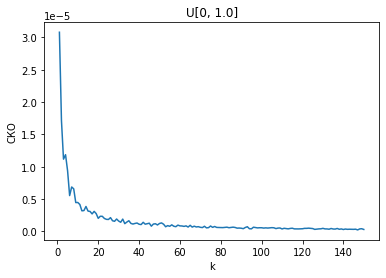

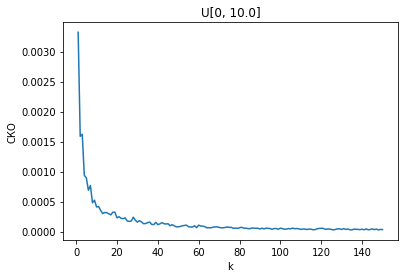

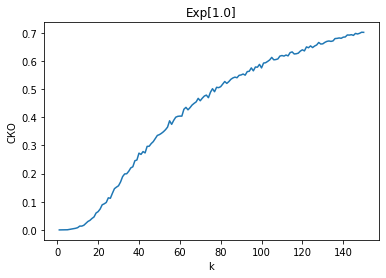

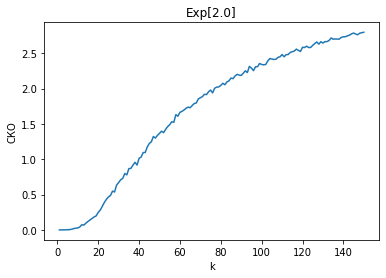

In [ ]:
draw_sko_plot_by_k(UniformDistrMomentsEstimate(1.0))
draw_sko_plot_by_k(UniformDistrMomentsEstimate(10.0))
draw_sko_plot_by_k(ExponentialDistrMomentsEstimate(1.0))
draw_sko_plot_by_k(ExponentialDistrMomentsEstimate(2.0))